In [1]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

import numpy as np
import pandas 
import random 
import math
import time


In [2]:
dataframe = pandas.read_csv("ionosphere_data.csv")

In [3]:
print(dataframe.head())

   1  0  0.99539  -0.05889  0.85243  0.02306  0.83398  -0.37708      1.1  \
0  1  0  1.00000  -0.18829  0.93035 -0.36156 -0.10868  -0.93597  1.00000   
1  1  0  1.00000  -0.03365  1.00000  0.00485  1.00000  -0.12062  0.88965   
2  1  0  1.00000  -0.45161  1.00000  1.00000  0.71216  -1.00000  0.00000   
3  1  0  1.00000  -0.02401  0.94140  0.06531  0.92106  -0.23255  0.77152   
4  1  0  0.02337  -0.00592 -0.09924 -0.11949 -0.00763  -0.11824  0.14706   

   0.03760  ...  -0.51171  0.41078  -0.46168  0.21266  -0.34090  0.42267  \
0 -0.04549  ...  -0.26569 -0.20468  -0.18401 -0.19040  -0.11593 -0.16626   
1  0.01198  ...  -0.40220  0.58984  -0.22145  0.43100  -0.17365  0.60436   
2  0.00000  ...   0.90695  0.51613   1.00000  1.00000  -0.20099  0.25682   
3 -0.16399  ...  -0.65158  0.13290  -0.53206  0.02431  -0.62197 -0.05707   
4  0.06637  ...  -0.01535 -0.03240   0.09223 -0.07859   0.00732  0.00000   

   -0.54487  0.18641  -0.45300  g  
0  -0.06288 -0.13738  -0.02447  b  
1  -0.24180  0

In [4]:
print(dataframe.describe())

                1      0     0.99539    -0.05889     0.85243     0.02306  \
count  350.000000  350.0  350.000000  350.000000  350.000000  350.000000   
mean     0.891429    0.0    0.640330    0.044667    0.600350    0.116154   
std      0.311546    0.0    0.498059    0.442032    0.520431    0.461443   
min      0.000000    0.0   -1.000000   -1.000000   -1.000000   -1.000000   
25%      1.000000    0.0    0.471518   -0.065388    0.412555   -0.024868   
50%      1.000000    0.0    0.870795    0.016700    0.808620    0.021170   
75%      1.000000    0.0    1.000000    0.194727    1.000000    0.335318   
max      1.000000    0.0    1.000000    1.000000    1.000000    1.000000   

          0.83398    -0.37708         1.1     0.03760  ...     0.56811  \
count  350.000000  350.000000  350.000000  350.000000  ...  350.000000   
mean     0.549284    0.120779    0.510453    0.181756  ...    0.395643   
std      0.493124    0.520816    0.507117    0.484482  ...    0.579206   
min     -1.000000  

In [5]:
print("Shape:", dataframe.shape)

Shape: (350, 35)


In [6]:
print("Data Types:", dataframe.dtypes)

Data Types: 1              int64
0              int64
0.99539      float64
-0.05889     float64
0.85243      float64
0.02306      float64
0.83398      float64
-0.37708     float64
1.1          float64
0.03760      float64
0.85243.1    float64
-0.17755     float64
0.59755      float64
-0.44945     float64
0.60536      float64
-0.38223     float64
0.84356      float64
-0.38542     float64
0.58212      float64
-0.32192     float64
0.56971      float64
-0.29674     float64
0.36946      float64
-0.47357     float64
0.56811      float64
-0.51171     float64
0.41078      float64
-0.46168     float64
0.21266      float64
-0.34090     float64
0.42267      float64
-0.54487     float64
0.18641      float64
-0.45300     float64
g             object
dtype: object


In [7]:
print("Correlation:", dataframe.corr(method='pearson'))

Correlation:                   1   0   0.99539  -0.05889   0.85243   0.02306   0.83398  \
1          1.000000 NaN  0.301596 -0.006297  0.155750  0.127836  0.221436   
0               NaN NaN       NaN       NaN       NaN       NaN       NaN   
0.99539    0.301596 NaN  1.000000  0.143957  0.476106  0.026199  0.439608   
-0.05889  -0.006297 NaN  0.143957  1.000000  0.001477 -0.190469 -0.053673   
0.85243    0.155750 NaN  0.476106  0.001477  1.000000  0.038617  0.596761   
0.02306    0.127836 NaN  0.026199 -0.190469  0.038617  1.000000 -0.009900   
0.83398    0.221436 NaN  0.439608 -0.053673  0.596761 -0.009900  1.000000   
-0.37708   0.028071 NaN  0.010682  0.254716 -0.028520  0.274571 -0.149115   
1.1        0.188565 NaN  0.470618 -0.302097  0.449869 -0.120323  0.461131   
0.03760   -0.051602 NaN  0.048563  0.207541 -0.033840  0.199945 -0.089832   
0.85243.1  0.033499 NaN  0.324097 -0.189778  0.449341 -0.291265  0.412233   
-0.17755   0.072946 NaN  0.171587  0.315656  0.043871  0.163661

In [8]:
print(dataframe.values)

[[1 0 1.0 ... -0.13738 -0.02447 'b']
 [1 0 1.0 ... 0.56045 -0.38238 'g']
 [1 0 1.0 ... -0.32382 1.0 'b']
 ...
 [1 0 0.94701 ... 0.9269700000000001 -0.00577 'g']
 [1 0 0.9060799999999999 ... 0.87403 -0.16243 'g']
 [1 0 0.8471 ... 0.85764 -0.06151 'g']]


In [9]:
#shuffle
dataset = np.array(dataframe.values)
dataset_shuffle = np.copy(dataset)
np.random.shuffle(dataset_shuffle)
dataset_shuffle.reshape(350,35)

array([[1, 0, 0.0, ..., 0.0, 0.0, 'b'],
       [1, 0, 0.29202, ..., 0.39559, -0.032260000000000004, 'g'],
       [1, 0, 0.0, ..., -0.19792, -0.9375, 'b'],
       ...,
       [1, 0, 0.52542, ..., 0.76271, -0.10169, 'g'],
       [1, 0, 0.66161, ..., 1.0, 0.34731999999999996, 'b'],
       [1, 0, 0.9054700000000001, ..., 0.75495, 0.46301000000000003, 'g']],
      dtype=object)

In [10]:
#ont hot g = 0 b = 1
for i in range(350) :
    if dataset_shuffle[i,34] == 'g' :
        dataset_shuffle[i,34] = 0
    elif dataset_shuffle[i,34] == 'b' :
        dataset_shuffle[i,34] = 1

In [11]:
X_train = dataset_shuffle[:270,0:34]
Y_train = dataset_shuffle[:270,34:35]
X_train.reshape(270,34)
Y_train.reshape(270,1)

X_test = dataset_shuffle[270:,0:34]
Y_test = dataset_shuffle[270:,34:35]
X_test.reshape(80,34)
Y_test.reshape(80,1)

array([[1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=object)

In [12]:
pandas.DataFrame(Y_train)

,0
0,1
1,0
2,1
3,0
4,1
...,...
265,1
266,1
267,0
268,0


In [13]:
def ReLU(x) :
    return x * (x > 0) + 0.01 * x * (x <= 0)

def ReLU_der(x) :
    return 1 * (x > 0) + 0.01 * (x <= 0)
    
def Sigmoid(x) :
    x = x.astype('float64')
    return 1/(1+np.exp(-x))

def Sigmoid_der(x) :
    x = x.astype('float64')
    return Sigmoid(x) * (1 - Sigmoid(x))

def error(x, y) :
    CEE = 0
    for i in range(len(y)):
        if y[i] == 0 :
            CEE += -math.log(1-x[i])
        elif y[i] == 1:    
            CEE += -math.log(x[i])
    return CEE

------------------------------------
last Layer Node:  2
-
train error: 137.46384934448383
test error: 39.84352940287776


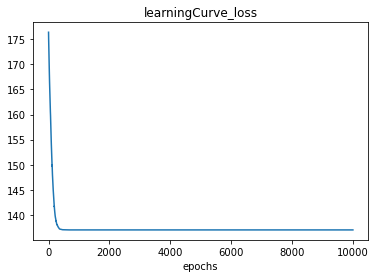

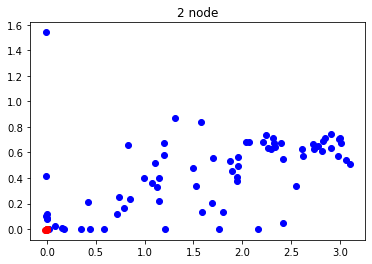

------------------------------------
------------------------------------
last Layer Node:  3
-
train error: 166.4136425267278
test error: 50.774510206073835


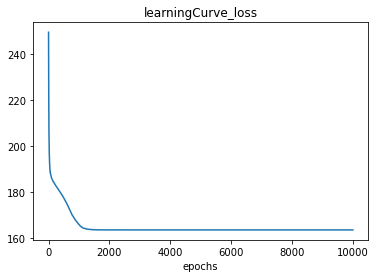

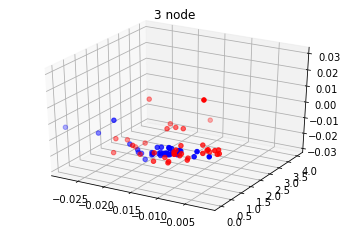


------------------------------------


In [14]:
epochtimes = 10000
mini_batch = 16
bestloss1 = 1e30 #Mini Batch Loss
preloss = 1e30   #decay the learning rate
start = time.time()

    
for i in range(2):

    lastLayerNode = i + 2

    #define weight:

    weight_hidden = np.random.random((34,32))-0.5
    weight_hidden2 = np.random.random((32,32))-0.5
    weight_hidden3 = np.random.random((32,32))-0.5
    weight_hidden4 = np.random.random((32,16))-0.5
    weight_hidden5 = np.random.random((16,lastLayerNode))-0.5
    weight_output = np.random.random((lastLayerNode,1))-0.5
    lr = 0.003

    bias = 0.01
    bias1 = 0.01
    bias2 = 0.01
    bias3 = 0.01
    bias4 = 0.01
    bias5 = 0.01

    ######
    
    loss = []
    
    for epoch in range(epochtimes):
        X_train_random = []
        Y_train_random = []
        for i in range(mini_batch):
            rindex = random.randint(0,len(X_train)-1)
            X_train_random.append(X_train[rindex,:])
            Y_train_random.append(Y_train[rindex,:])
        X_train_random = np.array(X_train_random)
        Y_train_random = np.array(Y_train_random)



        input_hidden = np.dot(X_train_random, weight_hidden) + bias
        output_hidden = ReLU(input_hidden)

        input_hidden2 = np.dot(output_hidden, weight_hidden2) + bias1
        output_hidden2 = ReLU(input_hidden2)
        input_hidden3 = np.dot(output_hidden2, weight_hidden3) + bias2
        output_hidden3 = ReLU(input_hidden3)
        input_hidden4 = np.dot(output_hidden3, weight_hidden4) + bias3
        output_hidden4 = ReLU(input_hidden4)
        input_hidden5 = np.dot(output_hidden4, weight_hidden5) + bias4
        output_hidden5 = ReLU(input_hidden5)
        input_op = np.dot(output_hidden5, weight_output)+ bias5
        output_op = Sigmoid(input_op)


        #==========================================

        derror_douto = output_op - Y_train_random
        douto_dino = Sigmoid_der(input_op)
        dino_dwo = output_hidden5      
        derror_dwo = np.dot(dino_dwo.T, derror_douto * douto_dino)
        derror_dbias5 = derror_douto * douto_dino

        #==========================================

        derror_dino = derror_douto * douto_dino
        dino_douth5 = weight_output
        derror_douth5 = np.dot(derror_dino, dino_douth5.T)
        douth5_dinh5 = ReLU_der(input_hidden5)
        dinh5_dwh5 = output_hidden4
        derror_dwh5 = np.dot(dinh5_dwh5.T, douth5_dinh5 * derror_douth5)
        derror_dbias4 = douth5_dinh5 * derror_douth5

        #==========================================

        derror_dinh5 = derror_douth5 * douth5_dinh5
        dinh5_douth4 = weight_hidden5
        derror_douth4 = np.dot(derror_dinh5, dinh5_douth4.T)
        douth4_dinh4 = ReLU_der(input_hidden4)
        dinh4_dwh4 = output_hidden3
        derror_dwh4 = np.dot(dinh4_dwh4.T, douth4_dinh4 * derror_douth4)
        derror_dbias3 = douth4_dinh4 * derror_douth4

        #==========================================

        derror_dinh4 = derror_douth4 * douth4_dinh4
        dinh4_douth3 = weight_hidden4
        derror_douth3 = np.dot(derror_dinh4, dinh4_douth3.T)
        douth3_dinh3 = ReLU_der(input_hidden3)
        dinh3_dwh3 = output_hidden2
        derror_dwh3 = np.dot(dinh3_dwh3.T, douth3_dinh3 * derror_douth3)
        derror_dbias2 = douth3_dinh3 * derror_douth3

        #==========================================

        derror_dinh3 = derror_douth3 * douth3_dinh3
        dinh3_douth2 = weight_hidden3
        derror_douth2 = np.dot(derror_dinh3, dinh3_douth2.T)
        douth2_dinh2 = ReLU_der(input_hidden2)
        dinh2_dwh2 = output_hidden
        derror_dwh2 = np.dot(dinh2_dwh2.T, douth2_dinh2 * derror_douth2)
        derror_dbias1 = douth2_dinh2 * derror_douth2

        #==========================================

        derror_dinh2 = derror_douth2 * douth2_dinh2
        dinh2_douth = weight_hidden2
        derror_douth = np.dot(derror_dinh2, dinh2_douth.T)
        douth_dinh = ReLU_der(input_hidden)
        dinh_dwh = X_train_random
        derror_dwh = np.dot(dinh_dwh.T, douth_dinh * derror_douth)    
        derror_dbias = douth_dinh * derror_douth

        #==========================================



        weight_hidden = weight_hidden-lr * derror_dwh
        weight_hidden2 = weight_hidden2-lr * derror_dwh2
        weight_hidden3 = weight_hidden3-lr * derror_dwh3
        weight_hidden4 = weight_hidden4-lr * derror_dwh4
        weight_hidden5 = weight_hidden5-lr * derror_dwh5
        weight_output = weight_output-lr * derror_dwo

        bias -= lr * derror_dbias.sum()/np.size(derror_dbias)
        bias1 -= lr * derror_dbias1.sum()/np.size(derror_dbias1)
        bias2 -= lr * derror_dbias2.sum()/np.size(derror_dbias2)
        bias3 -= lr * derror_dbias3.sum()/np.size(derror_dbias3)
        bias4 -= lr * derror_dbias4.sum()/np.size(derror_dbias4)
        bias5 -= lr * derror_dbias5.sum()/np.size(derror_dbias5)


        #calulate error 
        input_hidden = np.dot(X_train, weight_hidden) + bias
        output_hidden = ReLU(input_hidden)
        input_hidden2 = np.dot(output_hidden, weight_hidden2) + bias1
        output_hidden2 = ReLU(input_hidden2)
        input_hidden3 = np.dot(output_hidden2, weight_hidden3) + bias2
        output_hidden3 = ReLU(input_hidden3)
        input_hidden4 = np.dot(output_hidden3, weight_hidden4) + bias3
        output_hidden4 = ReLU(input_hidden4)
        input_hidden5 = np.dot(output_hidden4, weight_hidden5) + bias4
        output_hidden5 = ReLU(input_hidden5)
        input_op = np.dot(output_hidden5, weight_output)+ bias5
        output_op = Sigmoid(input_op)
        error_out = error(output_op, Y_train)
        loss.append(error_out)

        #set decay for learning rate
        if error_out > preloss :
            lr *= 0.9

        preloss = error_out

        #print(error_out)
        #print(error_out)
        #print('\n',lr * derror_dwh,'\n', lr * derror_dwo,'\n')


        #print(derror_wh, derror_wo)

            
    single_point = np.array(X_train)
    result1 = np.dot(single_point, weight_hidden)
    result2 = ReLU(result1)
    result3 = np.dot(result2, weight_hidden2)
    result4 = ReLU(result3)
    result5 = np.dot(result4, weight_hidden3)
    result6 = ReLU(result5)
    result7 = np.dot(result6, weight_hidden4)
    result8 = ReLU(result7)
    result9 = np.dot(result8, weight_hidden5)
    result10 = ReLU(result9)
    result11 = np.dot(result10, weight_output)
    result12 = Sigmoid(result11)
    print("------------------------------------")
    print("last Layer Node: ",lastLayerNode)
    print("-")
    error_out = error(result12, Y_train)
    print("train error:",error_out)
    
    single_point = np.array(X_test)
    result1 = np.dot(single_point, weight_hidden)
    result2 = ReLU(result1)
    result3 = np.dot(result2, weight_hidden2)
    result4 = ReLU(result3)
    result5 = np.dot(result4, weight_hidden3)
    result6 = ReLU(result5)
    result7 = np.dot(result6, weight_hidden4)
    result8 = ReLU(result7)
    result9 = np.dot(result8, weight_hidden5)
    result10 = ReLU(result9)
    result11 = np.dot(result10, weight_output)
    result12 = Sigmoid(result11)
    
    error_out = error(result12, Y_test)
    print("test error:",error_out)
    plt.plot(loss)
    plt.title('learningCurve_loss')
    plt.xlabel('epochs')

    plt.show()
    if (lastLayerNode == 2):
        
        group11 = [[],[]]
        group00 = [[],[]]
        
        for i in range(len(X_test)):
            if(result12[i]>=0.5):
                for indexx in range(2):
                    group11[indexx].append(result10[i][indexx])
            else:
                for indexx in range(2):
                    group00[indexx].append(result10[i][indexx])
        fig, aax = plt.subplots()
        aax.scatter(group00[0], group00[1],c='b')
        aax.scatter(group11[0], group11[1],c='r')
        aax.set_title('2 node');
        plt.show()
    elif (lastLayerNode == 3):
        
        group1 = [[],[],[]]
        group0 = [[],[],[]]

        for i in range(len(X_test)):
            if(result12[i]>=0.5):
                for indexx in range(3):
                    group1[indexx].append(result10[i][indexx])
            else:
                for indexx in range(3):
                    group0[indexx].append(result10[i][indexx])

        ax = plt.axes(projection='3d')
        ax.scatter3D(group1[0], group1[1], group1[2], c='r');
        ax.scatter3D(group0[0], group0[1], group0[2], c='b');
        ax.set_title('3 node');
        plt.show()
        print("")
    print("------------------------------------")

end = time.time()